In [17]:
# Dependencies and Setup
# Starter Code
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
# Starter Code
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# Starter Code
from citipy import citipy

# Range of latitudes and longitudes
# Starter Code
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
# Starter Code
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Starter Code
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# Starter Code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    # Starter Code
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
# Starter Code
len(cities)



590

In [19]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}units={units}&APPID={api_key}&q="

# set up lists to hold reponse info
name_list = []
long = []
lati = []
temp = []
humid = []
clouds = []
wind_speed = []

# Creates the count variable for record keeping
count = 1

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    print(f"Processing record {count} of {len(cities)} | {city}")
    print(f"{query_url}&q={city}")
    response = requests.get(query_url + city).json()
    if response["cod"] == "404" :
        print("City not found, skipped.")
        count += 1
        time.sleep(1)
    else:
        name_list.append(response["name"])
        long.append(response["coord"]["long"])
        lati.append(response["coord"]["lati"])
        temp.append(response['main']['temp'])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        count += 1
        time.sleep(1)

Beginning Data Retrieval
------------------------
Processing record 1 of 590 | wajir
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=YOUR API KEY HERE!&q=&q=wajir


KeyError: 'name'

In [20]:
# Create a dataframe from cities, long, lat, temp, humidity, clouds, and wind
weather_dict = {
    "City": name_list,
    "Longitude": long,
    "Latitude": lati,
    "Temperature": temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame(weather_dict)

# Output File (CSV)
weather_df.to_csv("../output_data/cities.csv", index=False)

# Displays the dataframe header
weather_df.head()

,City,Longitude,Latitude,Temperature,Humidity,Cloudiness,Wind Speed


In [21]:
# This is supplemental but included to represent both the breadth of the data plotted and, indirectly,
# how many API calls fulfilled or available data
finalcity = weather_df["City"].count()
percent = finalcity / len(cities) * 100

print(f" {len(cities)} cities generated, {finalcity} in the final data set.")
print(f"{round(percent,2)}% of data.")

 590 cities generated, 0 in the final data set.
0.0% of data.


#### Cities Sampled Plot (Longitude vs. Latitude)

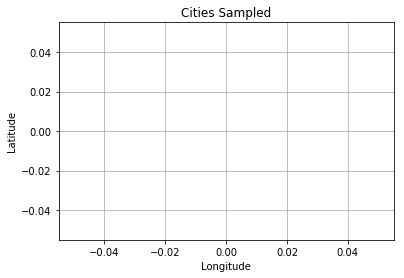

In [22]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Longitude"], weather_df["Latitude"], marker="o")

# Incorporate the other graph properties
plt.title("Cities Sampled")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Cities_Sampled.png")

# Show plot
plt.show()

#### Latitude vs. Temperature Plot

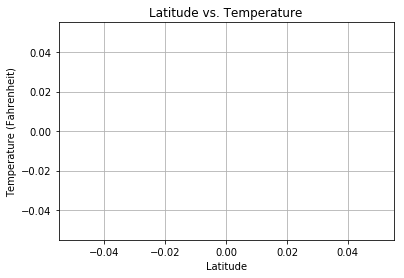

In [23]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude_vs_Temperatures.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

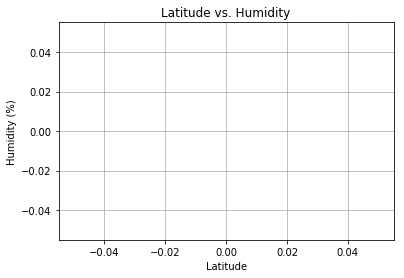

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

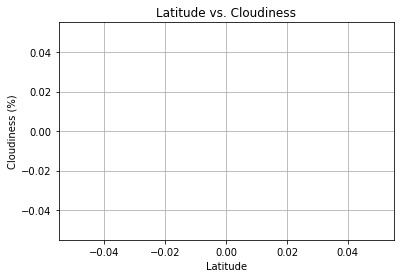

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

Scatter Plot Latitude-Wind Speed

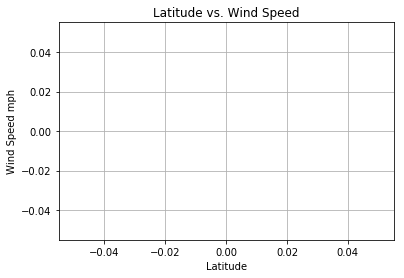

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Latitude_vs_Windspeed.png")

# Show plot
plt.show()